In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from perlin_noise import PerlinNoise

In [34]:
def g2d(n):
    x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
    d = np.sqrt(x*x + y*y)
    sigma, mu = 1.0, 0.0
    g = np.exp(-((d - mu)**2 / (2.0 * sigma**2)))
    return g

In [ ]:
n = np.array([0.2, 0.5, 0.9])
a = np.array([
    [5, 2, 0],
    [0, 0, 2],
])

u, inv = np.unique(a, return_inverse=True)
res = n[inv]
print(res)

[[0.9 0.5 0.2]
 [0.2 0.2 0.5]]


In [391]:
xpix, ypix = 10,10
N = 100000
p = np.zeros(N)
for i in range(N):
    noise = PerlinNoise(octaves=3)
    pic = np.array([[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)])
    p[i] = pic[6][9]

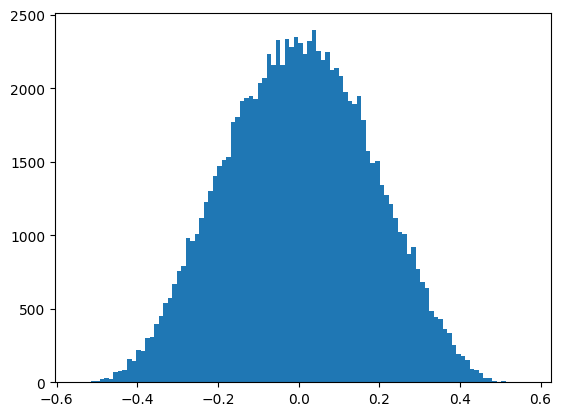

In [393]:
r=plt.hist(p, bins=100)

1.0


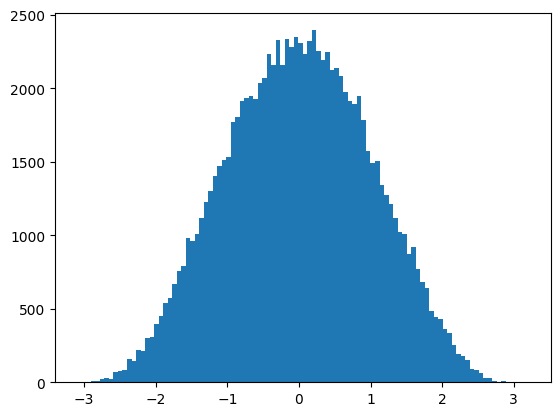

In [ ]:
pn = (p - p.mean()) / p.std()
r=plt.hist(pn, bins=100)

In [394]:
r2 = r[0]
r1 = np.zeros(len(r2))
for i in range(1,len(r[1])):
    r1[i-1] = 0.5*(r[1][i-1]+r[1][i])

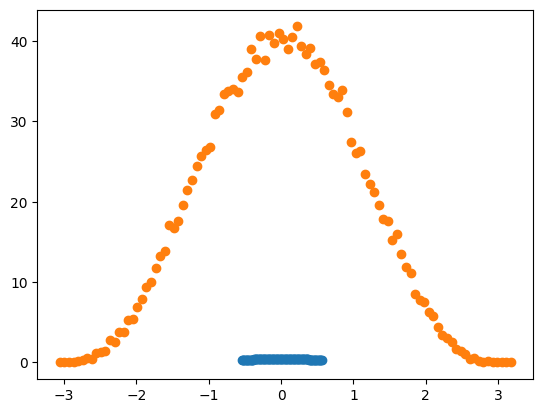

In [412]:
s = 1
c = 1/np.sqrt(2*np.pi*s**2)
g = c*np.exp(-(r1**2/(2*s**2)))
plt.scatter(r1, g)

# r2n = (r2 - r2.min()) / (r2.max() - r2.min())

plt.scatter(r1/np.std(p), r2/p.sum())

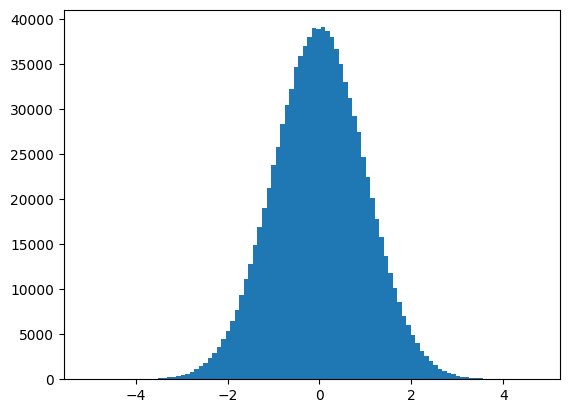

In [408]:
p2 = np.random.randn(1000000)
res=plt.hist(p2, bins=100)
res2 = res[0]
res1 = np.zeros(len(res2))
for i in range(1,len(res[1])):
    res1[i-1] = 0.5*(res[1][i-1]+res[1][i])

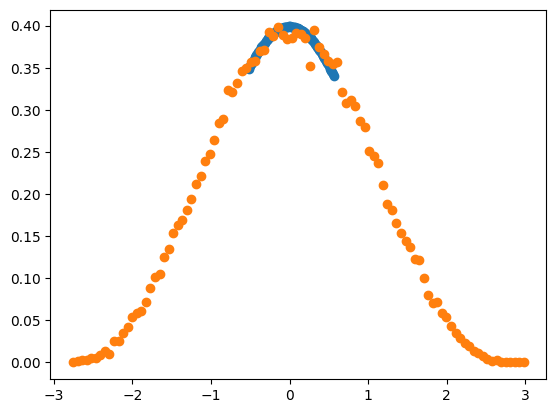

In [360]:
scale = 0.189
s = 1
c = 1/np.sqrt(2*np.pi*s**2)
# c = 1
g = c*np.exp(-((r1/s)**2/(2)))
plt.scatter(r1, g)
d = g[50]
plt.scatter(r1/scale, r2n*d)

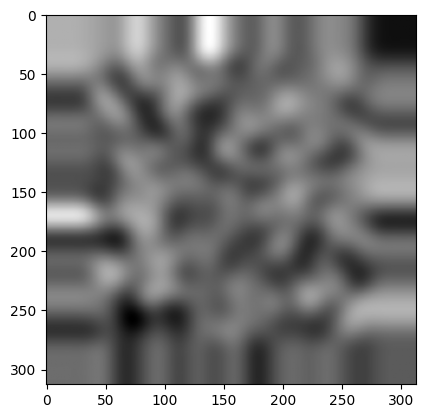

In [94]:
ds = [20,20,20]
a = np.random.random((256,256))

for d in ds:
    a = scipy.signal.convolve2d(a, g2d(d), boundary='symm')
plt.imshow(a, cmap='gray')

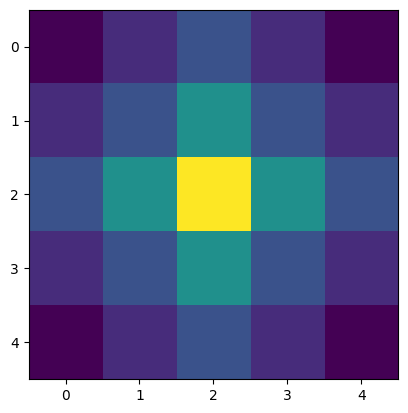

In [26]:
plt.imshow(f)